In [1]:
import pandas as pd

In [2]:
import io
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px

from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


In [3]:
#datos=pd.read_csv('prueba.csv')
datos_rs=pd.read_csv('Ia_torque05_rs.csv',header=0)
datos_r1b=pd.read_csv('Ia_torque05_r1b.csv',header=0)
datos_r2b=pd.read_csv('Ia_torque05_r2b.csv',header=0)
datos_r3b=pd.read_csv('Ia_torque05_r3b.csv',header=0)

In [4]:
from scipy import optimize
from scipy.optimize import curve_fit


In [5]:
new_data=[];
new_data_1=[];
new_data_2=[];
new_data_3=[];

# Ajuste de curvas

Como la corriente de un motor de inducción trifasico es una señal senoidal, se define como una. En todo el proceso de ajuste de la curva, se parte esta señal en tramos de 2048, obteniendo 400 partes de la señal senoidal. Esta señal se ajusta a la función definida anteriormente y se extraen nuevas caracteristicas, tales como la amplitud, la frecuencia y el desfase. 

In [6]:
for i in range(400):
    df=datos_rs[(i*2048):((i+1)*2048)]
    
    def test_func(x, a, b,c):
        return a*np.sin(b*x+c)
    
    x_data=df['t']
    y_data=df['Ia']
    params, params_covariance = curve_fit(test_func, x_data, y_data,p0=[1.5,0.005,0.5])
    new_data.append([])
    
    for j in range (3):
        new_data[i].append(abs(params[j]))
    
    


In [7]:
new_df=pd.DataFrame(new_data)
new_df

df_1=new_df.assign(Falla=1)
df_1.columns=['a','b','c','Falla']
df_1

,a,b,c,Falla
0,1.483343,0.007537,3.270044,1
1,1.487044,0.007576,9.670478,1
2,0.325148,0.003057,10.565691,1
3,1.488297,0.007541,18.996464,1
4,1.492459,0.007538,22.101698,1
...,...,...,...,...
395,1.487402,0.007573,2084.211342,1
396,1.490251,0.007541,2064.785794,1
397,1.493206,0.007531,2065.648930,1
398,0.224770,0.003226,1450.686299,1


In [8]:
for i in range(400):
    df_r1b=datos_r1b[(i*2048):((i+1)*2048)]
    
    def test_func1(x, a1, b1,c1):
        return a1*np.sin(b1*x+c1)
    
    x_data1=df_r1b['t']
    y_data1=df_r1b['Ia']
    params1, params_covariance1 = curve_fit(test_func1, x_data1, y_data1,p0=[1.4,0.005,0.5])
    new_data_1.append([])
    
    for j in range (3):
        new_data_1[i].append(abs(params1[j]))

In [9]:
new_df_1=pd.DataFrame(new_data_1)

df_2= new_df_1.assign(Falla=2)

df_2.columns=['a','b','c','Falla']
df_2

,a,b,c,Falla
0,1.562759,0.007521,0.657728,2
1,0.491708,0.002951,5.144481,2
2,1.561452,0.007497,11.705086,2
3,1.563253,0.007537,18.185454,2
4,1.565572,0.007565,24.729743,2
...,...,...,...,...
395,1.563322,0.007518,2037.554435,2
396,1.562033,0.007500,2029.254560,2
397,1.565354,0.007510,2044.186868,2
398,1.564485,0.007539,2073.430804,2


In [10]:
for i in range(400):
    df_r2b=datos_r2b[(i*2048):((i+1)*2048)]
    
    def test_func2(x, a2, b2,c2):
        return a2*np.sin(b2*x+c2)
    
    x_data2=df_r2b['t']
    y_data2=df_r2b['Ia']
    params2, params_covariance2 = curve_fit(test_func2, x_data2, y_data2,p0=[1.4,0.005,0.5])
    new_data_2.append([])
    
    for j in range (3):
        new_data_2[i].append(abs(params2[j]))

In [11]:
new_df_2=pd.DataFrame(new_data_2)

df_3=new_df_2.assign(Falla=3)
df_3.columns=['a','b','c','Falla']
df_3

,a,b,c,Falla
0,1.450704,0.007519,3.083781,3
1,1.443309,0.007526,15.652305,3
2,1.448817,0.007537,12.550793,3
3,1.443247,0.007554,18.974841,3
4,1.447012,0.007559,22.211843,3
...,...,...,...,...
395,1.446685,0.007539,2056.270326,3
396,1.448230,0.007552,2047.812018,3
397,1.446727,0.007555,2078.270294,3
398,1.445473,0.007539,2071.606515,3


In [12]:
for i in range(400):
    df_r3b=datos_r3b[(i*2048):((i+1)*2048)]
    
    def test_func3(x, a3, b3,c3):
        return a3*np.sin(b3*x+c3)
    
    x_data3=df_r3b['t']
    y_data3=df_r3b['Ia']
    params3, params_covariance3 = curve_fit(test_func3, x_data3, y_data3,p0=[1.4,0.005,0.5])
    new_data_3.append([])
    
    for j in range (3):
        new_data_3[i].append(abs(params3[j]))

In [13]:
new_df_3=pd.DataFrame(new_data_3)

df_4=new_df_3.assign(Falla=4)
df_4.columns=['a','b','c','Falla']
df_4

,a,b,c,Falla
0,1.457093,0.007527,3.113281,4
1,0.491946,0.003020,1.519029,4
2,0.343049,0.003070,10.434653,4
3,1.461247,0.007517,18.683217,4
4,1.469978,0.007527,21.839715,4
...,...,...,...,...
395,1.471050,0.007594,2101.171704,4
396,1.475680,0.007528,2053.549923,4
397,1.486238,0.007511,2036.461347,4
398,0.235787,0.003335,1359.177421,4


# Union de Dataframes

In [14]:
df_general=pd.concat([df_1,df_2,df_3,df_4],ignore_index=True)
df_general

,a,b,c,Falla
0,1.483343,0.007537,3.270044,1
1,1.487044,0.007576,9.670478,1
2,0.325148,0.003057,10.565691,1
3,1.488297,0.007541,18.996464,1
4,1.492459,0.007538,22.101698,1
...,...,...,...,...
1595,1.471050,0.007594,2101.171704,4
1596,1.475680,0.007528,2053.549923,4
1597,1.486238,0.007511,2036.461347,4
1598,0.235787,0.003335,1359.177421,4


In [15]:
df_general=df_general.sample(frac=1).reset_index(drop=True)
df_general

,a,b,c,Falla
0,1.456877,0.007514,642.880814,4
1,1.573550,0.007548,37.209921,2
2,1.442050,0.007602,1244.553376,4
3,1.435267,0.007517,1391.081706,3
4,1.481110,0.007564,852.677601,1
...,...,...,...,...
1595,1.556152,0.007505,1977.712795,2
1596,1.568852,0.007542,839.761135,2
1597,1.442987,0.007517,665.610451,3
1598,1.558264,0.007564,1243.862765,2


# Analisis descriptivo del Dataframe 

In [16]:
df_general.describe()

,a,b,c,Falla
count,1600.000000,1.600000e+03,1600.000000,1600.000000
mean,1.358913,7.027555e-03,1012.714936,2.500000
std,0.366701,1.423580e-03,605.260174,1.118384
min,0.155625,5.900150e-07,0.657728,1.000000
25%,1.441036,7.507939e-03,486.138987,1.750000
50%,1.478351,7.533473e-03,997.565959,2.500000
75%,1.492388,7.551944e-03,1507.262437,3.250000
max,1.581185,7.615693e-03,5762.288143,4.000000


# Creación de cuadrículas de subtramas

In [17]:
import seaborn as sns

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

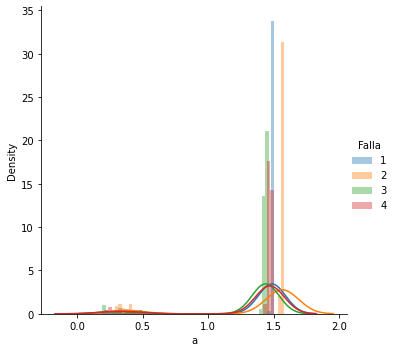

In [18]:
sns.FacetGrid(df_general, hue='Falla', height=5).map(sns.distplot, 'a').add_legend()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

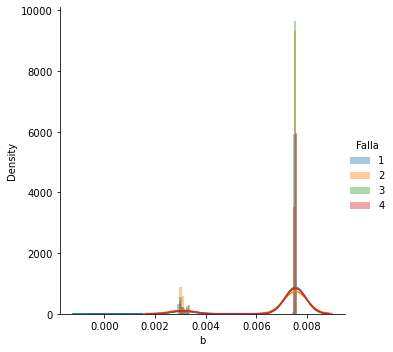

In [19]:
sns.FacetGrid(df_general, hue='Falla', height=5).map(sns.distplot, 'b').add_legend()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

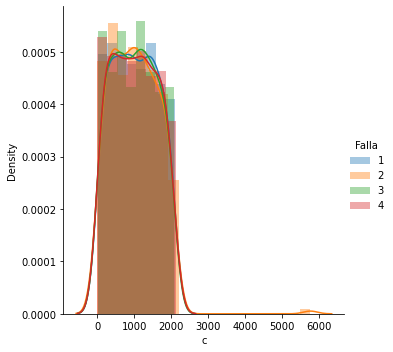

In [20]:
sns.FacetGrid(df_general, hue='Falla', height=5).map(sns.distplot, 'c').add_legend()

# Distribucion de los datos

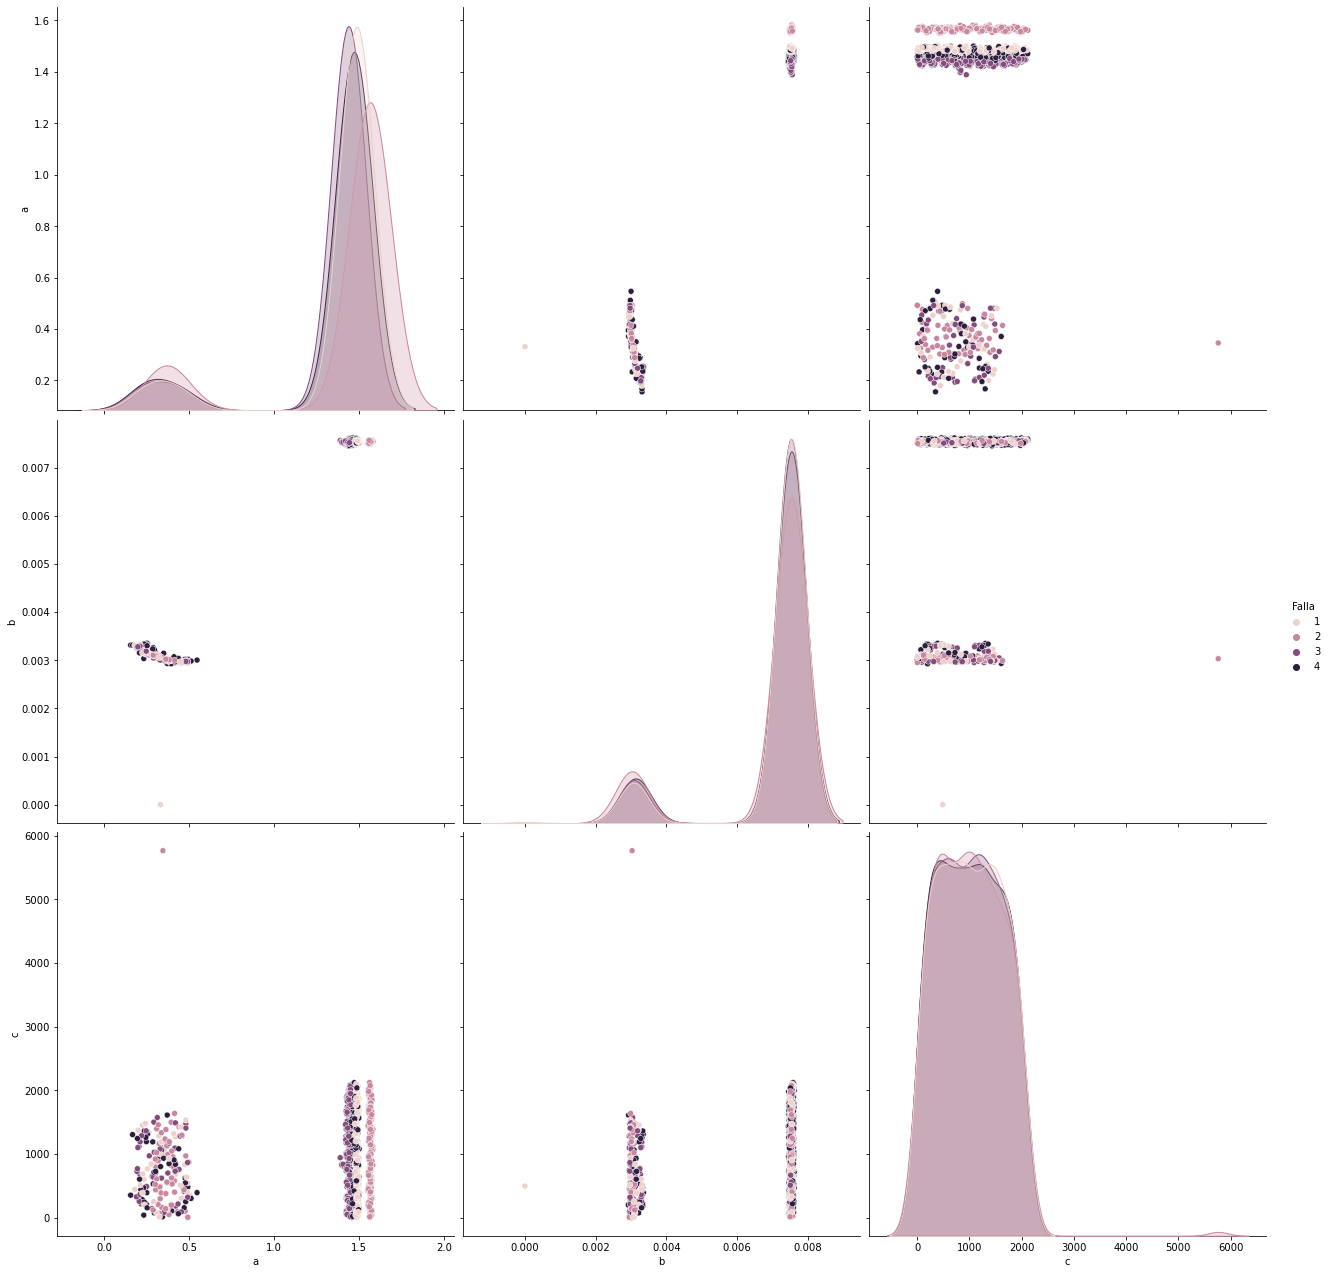

In [21]:
sns.pairplot(df_general, hue='Falla', height=6)
plt.savefig('Distribuciones.png',bbox_inches='tight')
plt.show()

# Verificacion de datos repetidos

In [22]:
freq = df_general.groupby(['a']).count()
freq

,b,c,Falla
a,,,
0.155625,1,1,1
0.167218,1,1,1
0.180048,1,1,1
0.190159,1,1,1
0.193326,1,1,1
...,...,...,...
1.578142,1,1,1
1.579645,1,1,1
1.579997,1,1,1


In [23]:
freq = df_general.groupby(['a', 'b','c']).size() 
freq

a         b         c          
0.155625  0.003313  351.000225     1
0.167218  0.003311  1302.070696    1
0.180048  0.003308  441.630252     1
0.190159  0.003290  325.217504     1
0.193326  0.003240  724.474253     1
                                  ..
1.578142  0.007546  1367.502936    1
1.579645  0.007542  1103.946918    1
1.579997  0.007540  823.181601     1
1.580253  0.007546  1064.959760    1
1.581185  0.007545  1382.569490    1
Length: 1600, dtype: int64

# Definición de X y Y - Entradas y Salida

In [24]:
y=df_general['Falla']
y

0       4
1       2
2       4
3       3
4       1
       ..
1595    2
1596    2
1597    3
1598    2
1599    1
Name: Falla, Length: 1600, dtype: int64

In [25]:
x=df_general[['a','b','c']]
x

,a,b,c
0,1.456877,0.007514,642.880814
1,1.573550,0.007548,37.209921
2,1.442050,0.007602,1244.553376
3,1.435267,0.007517,1391.081706
4,1.481110,0.007564,852.677601
...,...,...,...
1595,1.556152,0.007505,1977.712795
1596,1.568852,0.007542,839.761135
1597,1.442987,0.007517,665.610451
1598,1.558264,0.007564,1243.862765


# Implementación de algoritmos de Clasificación

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


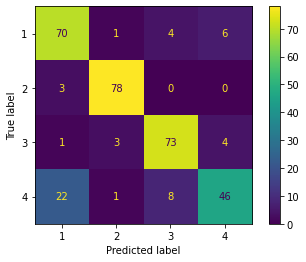

In [28]:
plot_confusion_matrix(rf, x_test1, y_test1) 
plt.show()

In [29]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.8283568399424874
Precision:  0.8372944509128952
Recall:  0.831449414782748
Accuracy:  0.834375


La importancia de las caracteristicas es una puntuacion asignada a las caracteristicas de un modelo de aprendizaje automatico que define lo "importante" que es una caracteristica para la predicción del modelo. 

In [30]:
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": rf.feature_importances_}
).sort_values("importance", ascending=False)

In [31]:
feature_importances_df

,feature,importance
0,a,0.669363
1,b,0.214057
2,c,0.116580


# SVC

In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [33]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train1,y_train1)
prediction=clf.predict(x_test1)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


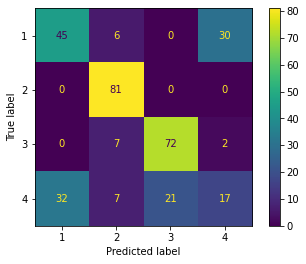

In [34]:
plot_confusion_matrix(clf, x_test1, y_test1) 
plt.show()

In [35]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.6392894050030671
Precision:  0.6268820265831718
Recall:  0.6663059163059164
Accuracy:  0.671875


# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


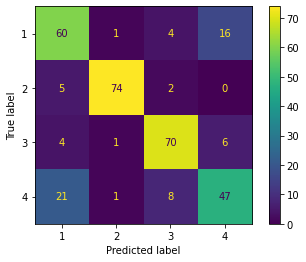

In [38]:
plot_confusion_matrix(dtc, x_test1, y_test1) 
plt.show()

In [39]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.7826959279119027
Precision:  0.785549595332204
Recall:  0.7822270322270322
Accuracy:  0.784375


In [40]:
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": dtc.feature_importances_}
).sort_values("importance", ascending=False)

In [41]:
feature_importances_df

,feature,importance
0,a,0.708859
1,b,0.226285
2,c,0.064856


# K Neighbors Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


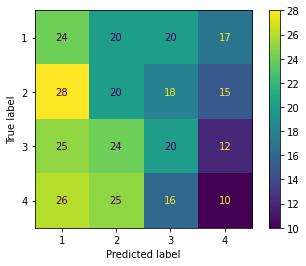

In [44]:
plot_confusion_matrix(neigh, x_test1, y_test1) 
plt.show()

In [45]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.2267249886796683
Precision:  0.22829606632922878
Recall:  0.22999839666506333
Accuracy:  0.23125


# New X 

A partir de las caracteristicas mas importantes utilizadas por cada modelo, se redefine la variable X

In [46]:
x=df_general[['a','b']]

# K-Fold

Proporciona índices de entrenamiento/prueba para dividir datos en conjuntos de entrenamiento/prueba. Divida el conjunto de datos en k pliegues consecutivos (sin barajar de forma predeterminada). Luego, cada pliegue se usa una vez como validación, mientras que los k - 1 pliegues restantes forman el conjunto de entrenamiento. 

In [47]:
from sklearn.model_selection import KFold

In [48]:
kf = KFold(n_splits=10,random_state=100,shuffle=True)
kf

KFold(n_splits=10, random_state=100, shuffle=True)

# K Fold - Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


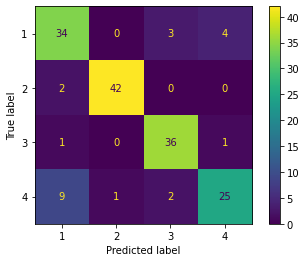

F1:  0.8511968746403296
Precision:  0.8568141836625647
Recall:  0.851714460989172
Accuracy:  0.85625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


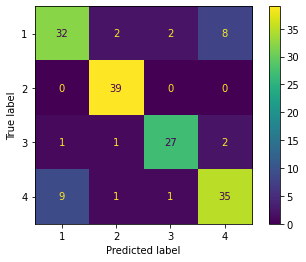

F1:  0.8374705573942158
Precision:  0.8366648209671464
Recall:  0.8397775086064005
Accuracy:  0.83125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


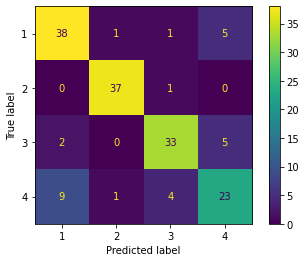

F1:  0.8155338736135935
Precision:  0.816837923980781
Recall:  0.8161875691480954
Accuracy:  0.81875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


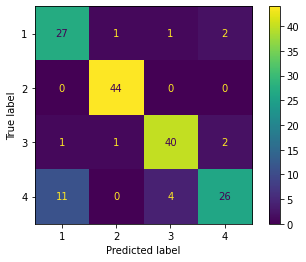

F1:  0.8451192799744786
Precision:  0.8510962467484207
Recall:  0.853551248122452
Accuracy:  0.85625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


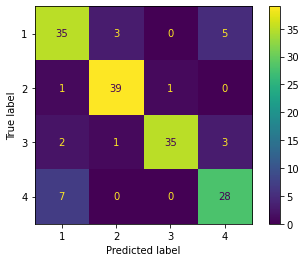

F1:  0.8554623193707701
Precision:  0.858688630490956
Recall:  0.8547078842881453
Accuracy:  0.85625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


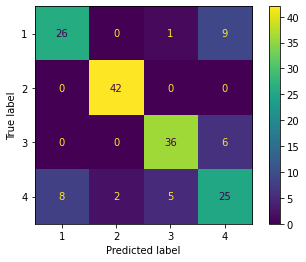

F1:  0.8004360465116279
Precision:  0.8003485485103132
Recall:  0.8010912698412699
Accuracy:  0.80625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


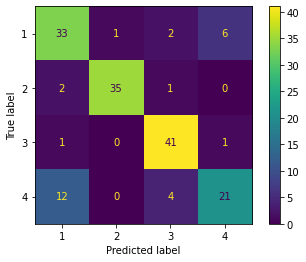

F1:  0.8066330066330066
Precision:  0.8159722222222222
Recall:  0.8069557142384559
Accuracy:  0.8125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


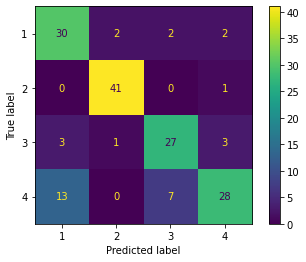

F1:  0.7848877724657646
Precision:  0.7893803766565914
Recall:  0.7967436974789917
Accuracy:  0.7875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


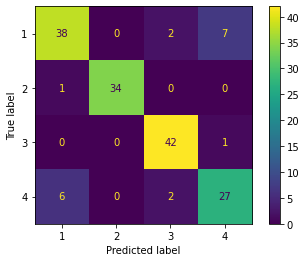

F1:  0.8817107497615558
Precision:  0.8822291235334714
Recall:  0.8820279918003817
Accuracy:  0.88125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


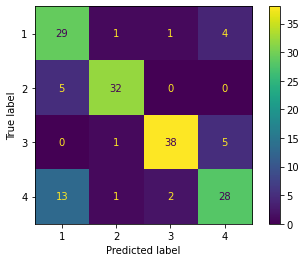

F1:  0.7954204084524505
Precision:  0.8037232539827246
Recall:  0.7983590733590734
Accuracy:  0.79375
--------------------------


In [50]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_entrenamiento,y_entrenamiento)
    y_pred=rf.predict(x_prueba)
    
    plot_confusion_matrix(rf, x_prueba, y_prueba) 
    plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

# K Fold - SVC

In [51]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


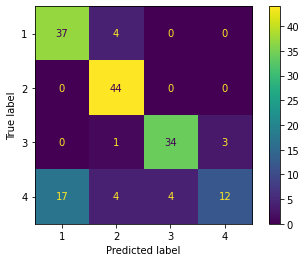

F1:  0.7606097917275346
Precision:  0.8025276766339329
Recall:  0.7803750477049578
Accuracy:  0.79375
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


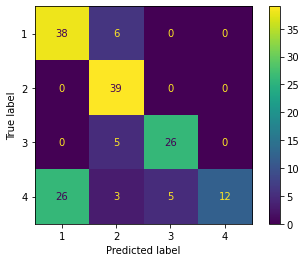

F1:  0.701008142881964
Precision:  0.7920771835057822
Recall:  0.7408039015682775
Accuracy:  0.71875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


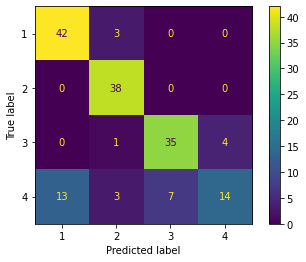

F1:  0.7796030240696712
Precision:  0.8047979797979798
Recall:  0.796677927927928
Accuracy:  0.80625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


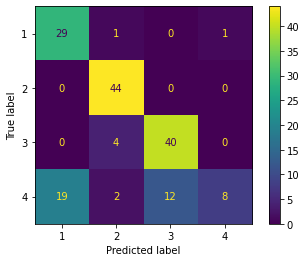

F1:  0.7034565844992227
Precision:  0.7812578557063851
Recall:  0.7599241828195409
Accuracy:  0.75625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


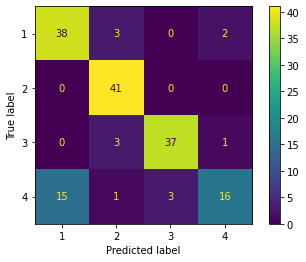

F1:  0.8047969551948952
Precision:  0.8345632654750083
Recall:  0.8108257029414149
Accuracy:  0.825
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


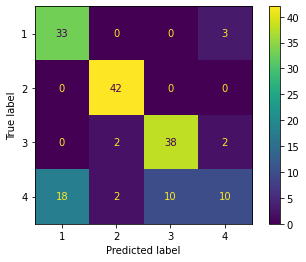

F1:  0.7303117380703588
Precision:  0.7546089087809036
Recall:  0.7678571428571428
Accuracy:  0.76875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


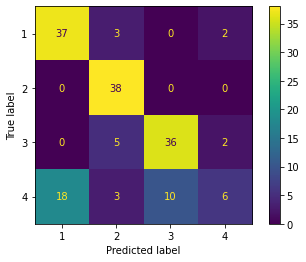

F1:  0.6751894323275156
Precision:  0.7077115431152698
Recall:  0.7200809613600312
Accuracy:  0.73125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


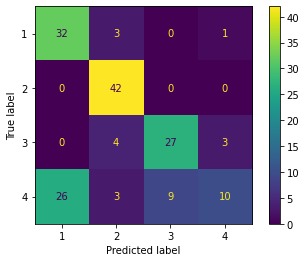

F1:  0.6671193254240612
Precision:  0.7059255399772641
Recall:  0.7228349673202614
Accuracy:  0.69375
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


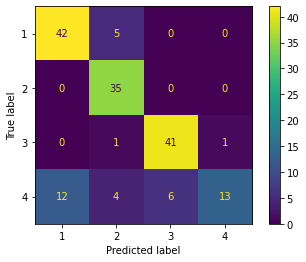

F1:  0.7871016310814756
Precision:  0.8391168524147248
Recall:  0.8046334911995476
Accuracy:  0.81875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


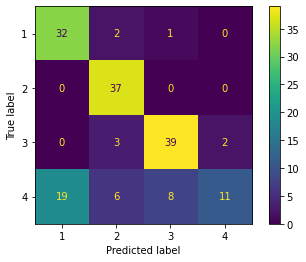

F1:  0.7121413202607423
Precision:  0.7642345399698341
Recall:  0.7626623376623376
Accuracy:  0.74375
--------------------------


In [52]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_entrenamiento,y_entrenamiento)
    y_pred=clf.predict(x_prueba)
       
    plot_confusion_matrix(clf, x_prueba, y_prueba) 
    plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

# K Fold - Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc= DecisionTreeClassifier(criterion='entropy')

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


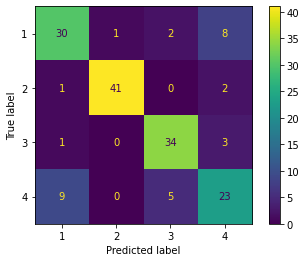

F1:  0.7940230422846124
Precision:  0.7940137437088656
Recall:  0.7949709906545593
Accuracy:  0.8
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


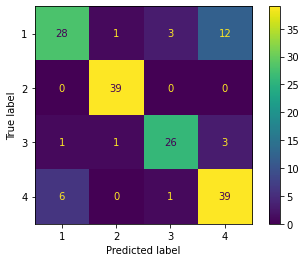

F1:  0.8290799439717784
Precision:  0.8350271002710028
Recall:  0.8307248501848783
Accuracy:  0.825
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


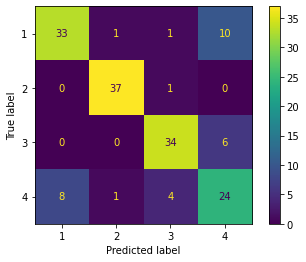

F1:  0.8004643612201752
Precision:  0.8008989993746092
Recall:  0.8014165481270744
Accuracy:  0.8
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


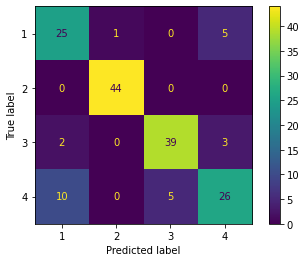

F1:  0.8259387830719622
Precision:  0.8261307430425077
Recall:  0.8317403976825692
Accuracy:  0.8375
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


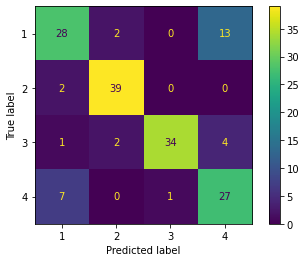

F1:  0.7995526497913796
Precision:  0.8072209461285349
Recall:  0.8007697917510737
Accuracy:  0.8
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


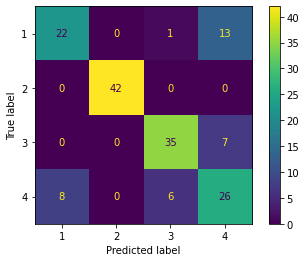

F1:  0.7761627906976745
Precision:  0.7829710144927536
Recall:  0.7736111111111111
Accuracy:  0.78125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


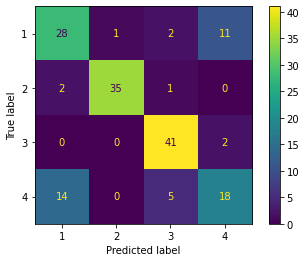

F1:  0.7544562122938974
Precision:  0.7564914284384331
Recall:  0.7569235392062809
Accuracy:  0.7625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


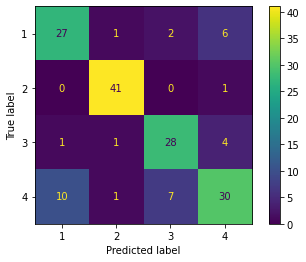

F1:  0.7865269498899341
Precision:  0.7827021428593957
Recall:  0.7936799719887955
Accuracy:  0.7875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


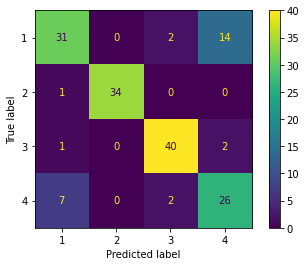

F1:  0.823253957436866
Precision:  0.825784632034632
Recall:  0.8260231851275889
Accuracy:  0.81875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


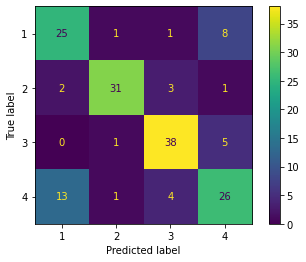

F1:  0.7508495416946122
Precision:  0.753212915601023
Recall:  0.7516672516672517
Accuracy:  0.75
--------------------------


In [55]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    dtc= DecisionTreeClassifier(criterion='entropy').fit(x_entrenamiento,y_entrenamiento)
    y_pred=dtc.predict(x_prueba)
       
    plot_confusion_matrix(dtc, x_prueba, y_prueba) 
    plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

# K Fold K Neighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
neigh = KNeighborsClassifier()

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


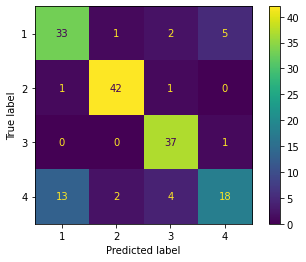

F1:  0.7966057958838937
Precision:  0.8065925209542231
Recall:  0.8048985500846861
Accuracy:  0.8125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


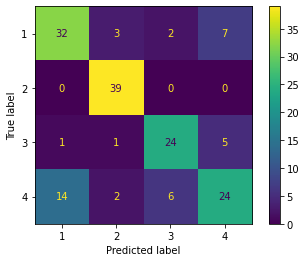

F1:  0.7447846868578576
Precision:  0.7410460992907801
Recall:  0.7558013515236517
Accuracy:  0.74375
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


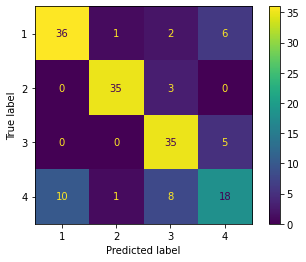

F1:  0.7663628038628038
Precision:  0.7696027408593
Recall:  0.7706347795163585
Accuracy:  0.775
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


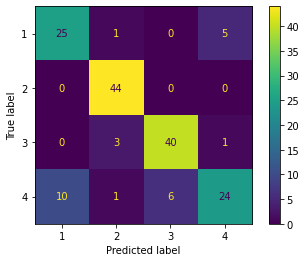

F1:  0.81718938590815
Precision:  0.8204525288376221
Recall:  0.8252270939131678
Accuracy:  0.83125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


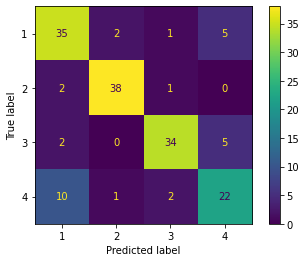

F1:  0.8012936862728521
Precision:  0.8058379561709151
Recall:  0.7996556194797828
Accuracy:  0.80625
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


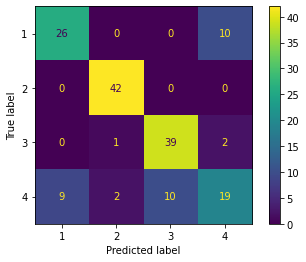

F1:  0.7725664330812462
Precision:  0.7712530173359666
Recall:  0.7814484126984128
Accuracy:  0.7875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


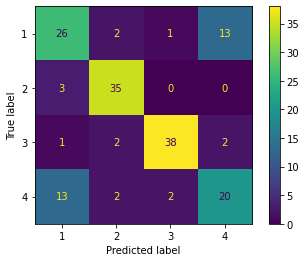

F1:  0.7395395288917255
Precision:  0.7391418847743294
Recall:  0.7410904303499162
Accuracy:  0.74375
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


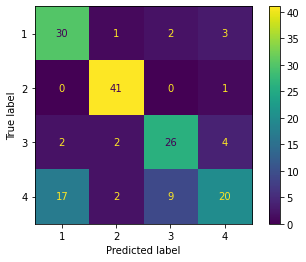

F1:  0.7241026726075563
Precision:  0.730134415693422
Recall:  0.7477240896358542
Accuracy:  0.73125
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


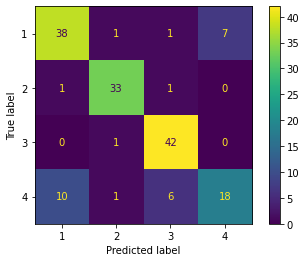

F1:  0.8061174844767529
Precision:  0.8130442176870747
Recall:  0.8105994203718102
Accuracy:  0.81875
--------------------------


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


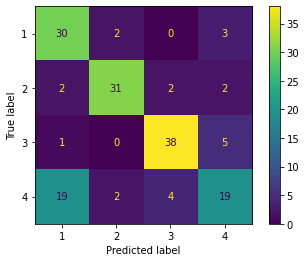

F1:  0.7337376480916868
Precision:  0.7453615350167073
Recall:  0.7476088101088101
Accuracy:  0.7375
--------------------------


In [58]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    neigh = KNeighborsClassifier().fit(x_entrenamiento,y_entrenamiento)
    y_pred=neigh.predict(x_prueba)
       
    plot_confusion_matrix(neigh, x_prueba, y_prueba) 
    plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')